In [9]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [10]:
X_orig = np.load('../../data/processed_data/specgram_db_pad_trunc.npy')

X_specaug1 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask1.npy')
X_tsh1 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift1.npy')
X_randn1 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise1.npy')
X_tstr1 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch1.npy')

X_specaug2 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask2.npy')
X_tsh2 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift2.npy')
X_randn2 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise2.npy')
X_tstr2 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch2.npy')

X_specaug3 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask3.npy')
X_tsh3 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift3.npy')
X_randn3 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise3.npy')
X_tstr3 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch3.npy')

print(X_orig.shape)

(440, 128, 67)


In [11]:
#choose what to add to the orignal data
X = np.concatenate((X_orig,X_randn1), axis=0)
print(X.shape)

df = pd.read_csv("../../data/processed_data/metadata.csv")
category_to_number = {'brushing': 0, 'food': 1, 'isolation': 2}

# Create a new column with numerical values based on the mapping
df['numerical_situation'] = df['situation'].map(category_to_number)

y_orig = df['numerical_situation'].values
y = np.concatenate((y_orig, y_orig,), axis=0)
print(y.shape)

(880, 128, 67)
(880,)


In [12]:
# NEW to CONV nets
## We need to reshape our data to be the correct dimensions for
## the net
## observations, grid, colorvalues

##so we just need to add the colorvalues, 1 here represents single valued
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
print(X.shape)

(880, 128, 67, 1)


In [13]:
def plottv(history_dict,epochs):
    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
    plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()


    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
    plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss Function Value", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=100,
                                                       stratify=y)

In [15]:
## Importing the things
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

Epoch 1/90
1/1 [==============================] - 2s 2s/step - loss: 9.2235 - accuracy: 0.2132 - val_loss: 54.6382 - val_accuracy: 0.4638
Epoch 2/90
1/1 [==============================] - 1s 1s/step - loss: 46.2730 - accuracy: 0.5075 - val_loss: 58.7177 - val_accuracy: 0.2809
Epoch 3/90
1/1 [==============================] - 1s 1s/step - loss: 54.6657 - accuracy: 0.2793 - val_loss: 24.8098 - val_accuracy: 0.2809
Epoch 4/90
1/1 [==============================] - 1s 1s/step - loss: 21.4195 - accuracy: 0.2793 - val_loss: 20.7153 - val_accuracy: 0.4638
Epoch 5/90
1/1 [==============================] - 1s 1s/step - loss: 17.9785 - accuracy: 0.5075 - val_loss: 11.2633 - val_accuracy: 0.4638
Epoch 6/90
1/1 [==============================] - 1s 1s/step - loss: 9.9509 - accuracy: 0.5075 - val_loss: 4.8338 - val_accuracy: 0.4638
Epoch 7/90
1/1 [==============================] - 1s 1s/step - loss: 4.3055 - accuracy: 0.5075 - val_loss: 2.0271 - val_accuracy: 0.4638
Epoch 8/90
1/1 [================

1/1 [==============================] - 5s 5s/step - loss: 0.0523 - accuracy: 0.9957 - val_loss: 0.7298 - val_accuracy: 0.8128
Epoch 61/90
1/1 [==============================] - 5s 5s/step - loss: 0.0483 - accuracy: 0.9915 - val_loss: 0.7533 - val_accuracy: 0.8298
Epoch 62/90
1/1 [==============================] - 4s 4s/step - loss: 0.0462 - accuracy: 0.9915 - val_loss: 0.7296 - val_accuracy: 0.8170
Epoch 63/90
1/1 [==============================] - 4s 4s/step - loss: 0.0384 - accuracy: 0.9915 - val_loss: 0.7322 - val_accuracy: 0.8085
Epoch 64/90
1/1 [==============================] - 4s 4s/step - loss: 0.0417 - accuracy: 0.9893 - val_loss: 0.7116 - val_accuracy: 0.8255
Epoch 65/90
1/1 [==============================] - 5s 5s/step - loss: 0.0275 - accuracy: 0.9936 - val_loss: 0.7452 - val_accuracy: 0.8213
Epoch 66/90
1/1 [==============================] - 4s 4s/step - loss: 0.0292 - accuracy: 0.9979 - val_loss: 0.7196 - val_accuracy: 0.8170
Epoch 67/90
1/1 [=============================

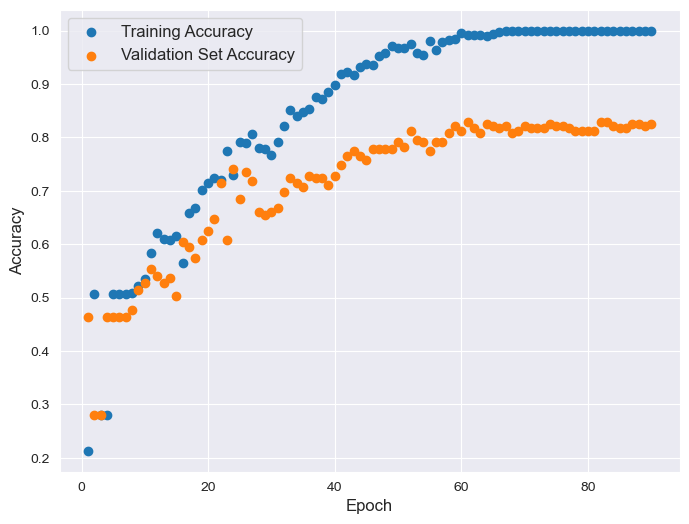

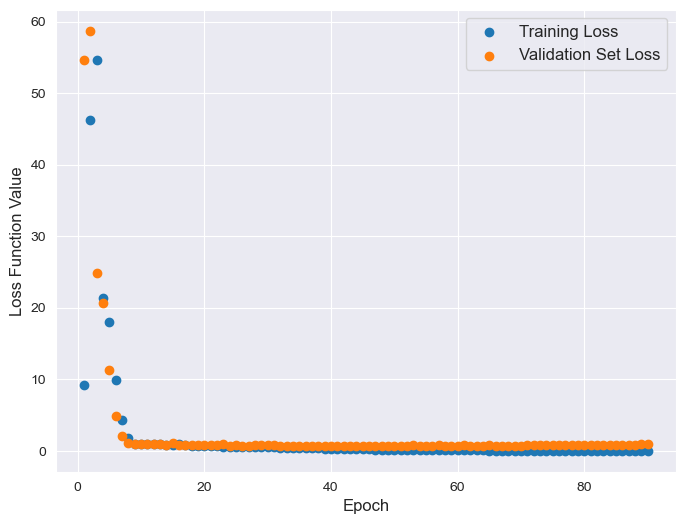

Epoch 1/90
1/1 [==============================] - 5s 5s/step - loss: 2.1899 - accuracy: 0.4435 - val_loss: 84.4726 - val_accuracy: 0.2979
Epoch 2/90
1/1 [==============================] - 4s 4s/step - loss: 86.3054 - accuracy: 0.2708 - val_loss: 30.0098 - val_accuracy: 0.2383
Epoch 3/90
1/1 [==============================] - 4s 4s/step - loss: 30.0334 - accuracy: 0.2217 - val_loss: 9.5276 - val_accuracy: 0.2383
Epoch 4/90
1/1 [==============================] - 4s 4s/step - loss: 9.1021 - accuracy: 0.2239 - val_loss: 2.1834 - val_accuracy: 0.4638
Epoch 5/90
1/1 [==============================] - 4s 4s/step - loss: 1.9494 - accuracy: 0.5075 - val_loss: 2.8332 - val_accuracy: 0.3064
Epoch 6/90
1/1 [==============================] - 4s 4s/step - loss: 2.7304 - accuracy: 0.2900 - val_loss: 1.5418 - val_accuracy: 0.4638
Epoch 7/90
1/1 [==============================] - 4s 4s/step - loss: 1.3788 - accuracy: 0.5075 - val_loss: 1.5859 - val_accuracy: 0.4638
Epoch 8/90
1/1 [=====================

1/1 [==============================] - 5s 5s/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.5712 - val_accuracy: 0.8128
Epoch 61/90
1/1 [==============================] - 4s 4s/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.5718 - val_accuracy: 0.8085
Epoch 62/90
1/1 [==============================] - 4s 4s/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.5818 - val_accuracy: 0.7915
Epoch 63/90
1/1 [==============================] - 4s 4s/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.5913 - val_accuracy: 0.8085
Epoch 64/90
1/1 [==============================] - 4s 4s/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.5824 - val_accuracy: 0.8085
Epoch 65/90
1/1 [==============================] - 4s 4s/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.5735 - val_accuracy: 0.8128
Epoch 66/90
1/1 [==============================] - 3s 3s/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.5731 - val_accuracy: 0.8128
Epoch 67/90
1/1 [=============================

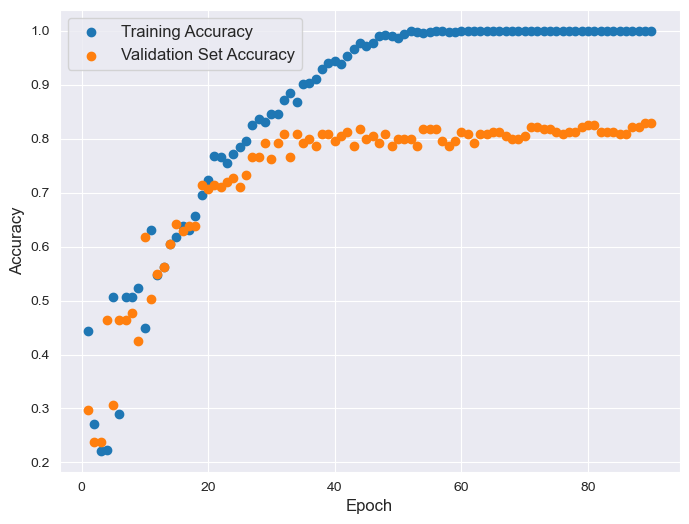

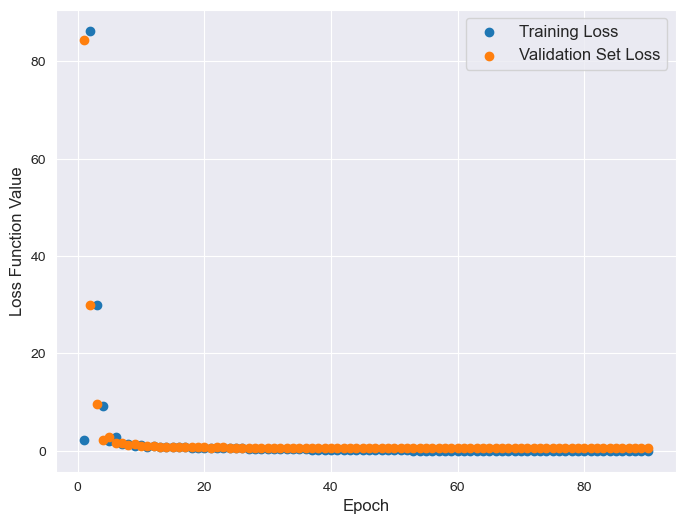

Epoch 1/90
1/1 [==============================] - 4s 4s/step - loss: 2.5019 - accuracy: 0.2489 - val_loss: 50.7288 - val_accuracy: 0.2607
Epoch 2/90
1/1 [==============================] - 4s 4s/step - loss: 66.0172 - accuracy: 0.2894 - val_loss: 46.1237 - val_accuracy: 0.5513
Epoch 3/90
1/1 [==============================] - 4s 4s/step - loss: 58.1045 - accuracy: 0.4638 - val_loss: 22.2318 - val_accuracy: 0.5513
Epoch 4/90
1/1 [==============================] - 4s 4s/step - loss: 27.2271 - accuracy: 0.4638 - val_loss: 7.3419 - val_accuracy: 0.5513
Epoch 5/90
1/1 [==============================] - 4s 4s/step - loss: 8.7821 - accuracy: 0.4638 - val_loss: 1.9951 - val_accuracy: 0.5513
Epoch 6/90
1/1 [==============================] - 4s 4s/step - loss: 2.2794 - accuracy: 0.4638 - val_loss: 0.9747 - val_accuracy: 0.5513
Epoch 7/90
1/1 [==============================] - 4s 4s/step - loss: 1.0291 - accuracy: 0.4638 - val_loss: 1.0014 - val_accuracy: 0.5641
Epoch 8/90
1/1 [===================

1/1 [==============================] - 4s 4s/step - loss: 0.1169 - accuracy: 0.9638 - val_loss: 0.7560 - val_accuracy: 0.7949
Epoch 61/90
1/1 [==============================] - 4s 4s/step - loss: 0.1096 - accuracy: 0.9702 - val_loss: 0.7490 - val_accuracy: 0.8205
Epoch 62/90
1/1 [==============================] - 4s 4s/step - loss: 0.1022 - accuracy: 0.9702 - val_loss: 0.7524 - val_accuracy: 0.8162
Epoch 63/90
1/1 [==============================] - 4s 4s/step - loss: 0.0957 - accuracy: 0.9745 - val_loss: 0.7722 - val_accuracy: 0.8205
Epoch 64/90
1/1 [==============================] - 4s 4s/step - loss: 0.0884 - accuracy: 0.9766 - val_loss: 0.7967 - val_accuracy: 0.8162
Epoch 65/90
1/1 [==============================] - 4s 4s/step - loss: 0.0829 - accuracy: 0.9809 - val_loss: 0.8082 - val_accuracy: 0.8205
Epoch 66/90
1/1 [==============================] - 4s 4s/step - loss: 0.0768 - accuracy: 0.9851 - val_loss: 0.8163 - val_accuracy: 0.8291
Epoch 67/90
1/1 [=============================

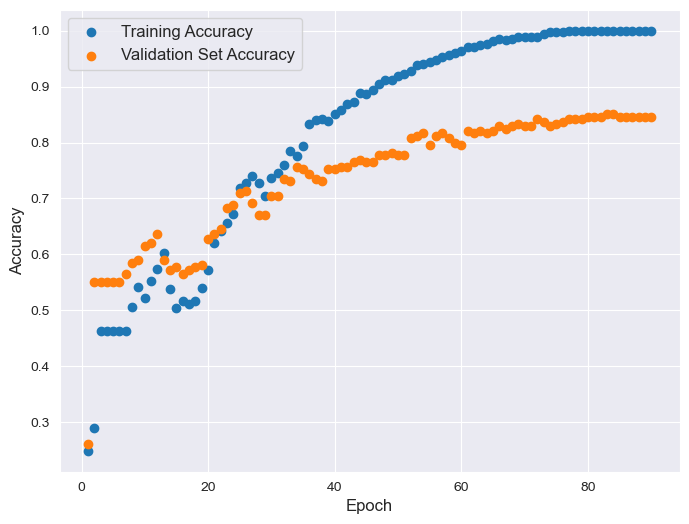

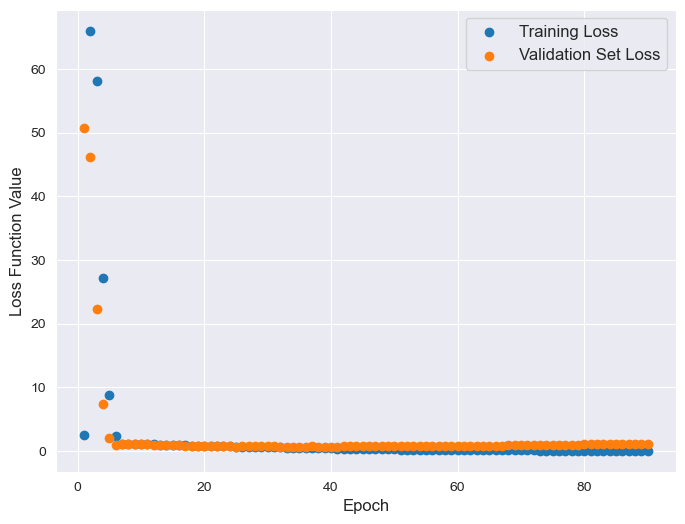

In [16]:
## Cross Validation folds
kfold = StratifiedKFold(3,
                        shuffle=True,
                        random_state=846)
epochs=90

for train_index, test_index in kfold.split(X_train,y_train):
    
    X_tt, X_val = X[train_index], X[test_index]
    y_tt, y_val = y[train_index], y[test_index]
    
    model = models.Sequential()
    model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
    model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
    model.add( layers.Conv2D(64, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides=2) )
    #model.add( layers.Conv2D(128, (6,3), activation='relu'))
    #model.add( layers.MaxPooling2D( (4,2), strides=2) )
    
    
    model.add( layers.Flatten() )
    model.add(layers.Dense(45, activation='relu'))

    ## Finally an output layer
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_tt, 
                          to_categorical(y_tt), 
                          epochs=epochs, 
                          batch_size=len(y_tt),
                          validation_data=(X_val,to_categorical(y_val)))
    history_dict = history.history
    plottv(history_dict,epochs)

In [17]:
epochs = 60 ##earlier stop, observed from Cross validation

model = models.Sequential()
model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
model.add( layers.Conv2D(64, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
#model.add( layers.Conv2D(96, (6,4), activation='relu'))
#model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
model.add( layers.Flatten() )
model.add(layers.Dense(45, activation='relu'))

## Finally an output layer
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, 
                    to_categorical(y_train), 
                    epochs=epochs, 
                    batch_size=len(y_train)
                    )
#history_dict = history.history
#plottv(history_dict,epochs)

Epoch 1/60
1/1 [==============================] - 2s 2s/step - loss: 6.3774 - accuracy: 0.2088
Epoch 2/60
1/1 [==============================] - 2s 2s/step - loss: 43.2559 - accuracy: 0.2884
Epoch 3/60
1/1 [==============================] - 2s 2s/step - loss: 50.1738 - accuracy: 0.5028
Epoch 4/60
1/1 [==============================] - 2s 2s/step - loss: 23.2284 - accuracy: 0.5028
Epoch 5/60
1/1 [==============================] - 2s 2s/step - loss: 6.7151 - accuracy: 0.5028
Epoch 6/60
1/1 [==============================] - 2s 2s/step - loss: 1.3864 - accuracy: 0.5028
Epoch 7/60
1/1 [==============================] - 2s 2s/step - loss: 1.0396 - accuracy: 0.4730
Epoch 8/60
1/1 [==============================] - 2s 2s/step - loss: 1.0511 - accuracy: 0.4972
Epoch 9/60
1/1 [==============================] - 2s 2s/step - loss: 1.0147 - accuracy: 0.5668
Epoch 10/60
1/1 [==============================] - 2s 2s/step - loss: 0.9489 - accuracy: 0.5710
Epoch 11/60
1/1 [=============================

In [230]:
model.evaluate(X_test,to_categorical(y_test))